In [90]:
import pandas as pd
dataset=pd.read_excel('UDJG_CHILD_CONS.xls')
dataset2=pd.read_excel('UDJG_CHILD_FOODS.xls')
dataset3=pd.read_excel('UDJG_CHILD_SUBJ.xls')

In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import random
from collections import Counter
import numpy as np

In [92]:
columns_to_delete=['SURVEY', 'CONDAY', 'CONMONTH', 'CONYEAR', 'EXCEPTIONDAY', 'TIMEHOUR', 'TIMEMINUTES', 'UNITMEAS', 
                   'BRAND', 'ORFACETSCODE', 'ORFACETS', 'ENFACETS', 'PACKAGE', 'OFACETS', 'ORRECIPECODE', 'ENRECIPEDESC', 'AMOUNTRECIPE', 'FPREP', 'FOODEXRCODE']
dataset=dataset.drop(columns=columns_to_delete, axis=1)

In [93]:
columns_to_delete3=['SURVEY', 'COUNTRY', 'BIRTHDAY', 'BIRTHMONTH', 'BIRTHYEAR', 'FANTYEAR', 
                    'SWEIGHT', 'SHEIGHT', 'SANTDAY', 'SANTMONTH', 'SANTYEAR', 'MWEIGHT', 'MHEIGHT', 'ENRGYINTAKE', 'UNOVREP', 
                    'WF', 'SPECIALCON', 'SPECDIET', 'ACTIVITY', 'ETHNIC', 'FANTMONTH', 'FANTDAY', 'EDUCATION', 'COMMENTSSUBJECT']
dataset3=dataset3.drop(columns=columns_to_delete3, axis=1)

In [94]:
columns_to_delete2=['SURVEY', 'COMMENTSFOOD', 'ENERGY', 'WATER', 'FAT', 'CARB', 'PROTEINS', 'ALCOHOL', 'ENFOODNAME', 'FOODEXCODE']
dataset2=dataset2.drop(columns=columns_to_delete2, axis=1)

In [95]:
dataset.head(10)

,ORSUBCODE,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,ORFOODCODE,AMOUNTFRAW,AMOUNTFCOOKED
0,CE001,1,W3,S5,M1,P1,1,NaN,414.1.5.3.0,250.0,250.0
1,CE001,1,W3,S5,M1,P1,2,NaN,204.1.2.5.7,30.0,30.0
2,CE001,1,W3,S5,M1,P1,3,NaN,207.1.1.6.0,50.0,50.0
3,CE001,1,W3,S5,M3,P1,1,NaN,101.6.1.4.0,200.0,200.0
4,CE001,1,W3,S5,M3,P1,2,NaN,101.4.0.0.0,30.0,30.0
5,CE001,1,W3,S5,M3,P1,3,NaN,206.1.1.0.0,250.0,250.0
6,CE001,1,W3,S5,M3,P1,4,piure de cartofi,204.2.1.30.0,284.0,213.0
7,CE001,1,W3,S5,M3,P1,4,piure de cartofi,101.1.1.1.0,40.0,40.0
8,CE001,1,W3,S5,M3,P1,4,piure de cartofi,612.1.1.0.0,5.0,5.0
9,CE001,1,W3,S5,M3,P1,4,piure de cartofi,102.2.2.0.0,40.0,40.0


In [96]:

columns_to_check_duplicates = ['ORSUBCODE', 'DAY', 'WEEK', 'SEASON', 'MEAL', 'PLACE', 'EATSEQ']
dataset_no_duplicates = dataset.drop_duplicates(subset=columns_to_check_duplicates, keep='first')

In [97]:
dataset_no_duplicates.head(10)

,ORSUBCODE,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,ORFOODCODE,AMOUNTFRAW,AMOUNTFCOOKED
0,CE001,1,W3,S5,M1,P1,1,NaN,414.1.5.3.0,250.0,250.0
1,CE001,1,W3,S5,M1,P1,2,NaN,204.1.2.5.7,30.0,30.0
2,CE001,1,W3,S5,M1,P1,3,NaN,207.1.1.6.0,50.0,50.0
3,CE001,1,W3,S5,M3,P1,1,NaN,101.6.1.4.0,200.0,200.0
4,CE001,1,W3,S5,M3,P1,2,NaN,101.4.0.0.0,30.0,30.0
5,CE001,1,W3,S5,M3,P1,3,NaN,206.1.1.0.0,250.0,250.0
6,CE001,1,W3,S5,M3,P1,4,piure de cartofi,204.2.1.30.0,284.0,213.0
10,CE001,1,W3,S5,M3,P1,5,NaN,108.2.2.3.7,143.0,100.0
11,CE001,1,W3,S5,M5,P1,1,chec,204.1.1.0.1,2.0,2.0
18,CE001,1,W3,S5,M5,P1,2,NaN,101.1.1.1.0,250.0,250.0


In [98]:
foodcode_to_recipe = dataset2.set_index('ORFOODCODE')['ORFOODNAME'].to_dict()

mask = pd.isna(dataset_no_duplicates['ORRECIPEDESC'])
dataset_no_duplicates.loc[mask, 'ORRECIPEDESC'] = dataset_no_duplicates.loc[mask, 'ORFOODCODE'].map(foodcode_to_recipe)

dataset_no_duplicates.insert(loc=11, column='GENDER', value='')
dataset_no_duplicates.insert(loc=12, column='AGE', value='')
dataset_no_duplicates.insert(loc=13, column='WEIGHT', value='')
dataset_no_duplicates.insert(loc=14, column='HEIGHT', value='')
dataset_no_duplicates.insert(loc=15, column='GEO', value='')


In [99]:
dataset_no_duplicates.head()

,ORSUBCODE,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,ORFOODCODE,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO
0,CE001,1,W3,S5,M1,P1,1,ceai,414.1.5.3.0,250.0,250.0,,,,,
1,CE001,1,W3,S5,M1,P1,2,gem de caise,204.1.2.5.7,30.0,30.0,,,,,
2,CE001,1,W3,S5,M1,P1,3,paine,207.1.1.6.0,50.0,50.0,,,,,
3,CE001,1,W3,S5,M3,P1,1,branza vaci,101.6.1.4.0,200.0,200.0,,,,,
4,CE001,1,W3,S5,M3,P1,2,smantana,101.4.0.0.0,30.0,30.0,,,,,


In [100]:
dataset3.head()

,ORSUBCODE,GENDER,AGE,WEIGHT,HEIGHT,GEO
0,CC021,G1,11,34.0,145.0,RO423
1,CC022,G1,15,52.0,178.0,RO423
2,CC023,G1,8,25.0,110.0,RO423
3,CC024,G1,3,10.0,85.0,RO423
4,CC025,G1,12,32.0,146.0,RO423


In [101]:
gender_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['GENDER']
age_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['AGE']
weight_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['WEIGHT']
height_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['HEIGHT']
geo_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['GEO']

dataset_no_duplicates.loc[:, 'GENDER'] = dataset_no_duplicates['ORSUBCODE'].map(gender_to_recipe)
dataset_no_duplicates.loc[:, 'AGE'] = dataset_no_duplicates['ORSUBCODE'].map(age_to_recipe)
dataset_no_duplicates.loc[:, 'WEIGHT'] = dataset_no_duplicates['ORSUBCODE'].map(weight_to_recipe)
dataset_no_duplicates.loc[:, 'HEIGHT'] = dataset_no_duplicates['ORSUBCODE'].map(height_to_recipe)
dataset_no_duplicates.loc[:, 'GEO'] = dataset_no_duplicates['ORSUBCODE'].map(geo_to_recipe)


In [102]:
foodcode_to_recipe = dataset2.set_index('ORFOODCODE')['ORFOODNAME'].to_dict()

mask = pd.isna(dataset_no_duplicates['ORRECIPEDESC'])
dataset_no_duplicates.loc[mask, 'ORRECIPEDESC'] = dataset_no_duplicates.loc[mask, 'ORFOODCODE'].map(foodcode_to_recipe)


In [103]:
dataset_no_duplicates.head(10)

,ORSUBCODE,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,ORFOODCODE,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO
0,CE001,1,W3,S5,M1,P1,1,ceai,414.1.5.3.0,250.0,250.0,G1,7,28.0,125.0,RO226
1,CE001,1,W3,S5,M1,P1,2,gem de caise,204.1.2.5.7,30.0,30.0,G1,7,28.0,125.0,RO226
2,CE001,1,W3,S5,M1,P1,3,paine,207.1.1.6.0,50.0,50.0,G1,7,28.0,125.0,RO226
3,CE001,1,W3,S5,M3,P1,1,branza vaci,101.6.1.4.0,200.0,200.0,G1,7,28.0,125.0,RO226
4,CE001,1,W3,S5,M3,P1,2,smantana,101.4.0.0.0,30.0,30.0,G1,7,28.0,125.0,RO226
5,CE001,1,W3,S5,M3,P1,3,mamaliga,206.1.1.0.0,250.0,250.0,G1,7,28.0,125.0,RO226
6,CE001,1,W3,S5,M3,P1,4,piure de cartofi,204.2.1.30.0,284.0,213.0,G1,7,28.0,125.0,RO226
10,CE001,1,W3,S5,M3,P1,5,friptura de vita,108.2.2.3.7,143.0,100.0,G1,7,28.0,125.0,RO226
11,CE001,1,W3,S5,M5,P1,1,chec,204.1.1.0.1,2.0,2.0,G1,7,28.0,125.0,RO226
18,CE001,1,W3,S5,M5,P1,2,lapte,101.1.1.1.0,250.0,250.0,G1,7,28.0,125.0,RO226


In [104]:
le = LabelEncoder()
#dataset['ORRECIPEDESC'] = le.fit_transform(dataset['ORRECIPEDESC'])
dataset_no_duplicates['ORRECIPEDESC_encoded'] = le.fit_transform(dataset_no_duplicates['ORRECIPEDESC'])

C:\Users\Silvian\AppData\Local\Temp\ipykernel_25068\95032008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_duplicates['ORRECIPEDESC_encoded'] = le.fit_transform(dataset_no_duplicates['ORRECIPEDESC'])


In [105]:
dataset_no_duplicates.loc[:, 'WEEK'] = dataset_no_duplicates['WEEK'].str.replace('W', '').astype(int)
dataset_no_duplicates.loc[:, 'SEASON'] = dataset_no_duplicates['SEASON'].str.replace('S', '').astype(int)
dataset_no_duplicates.loc[:, 'MEAL'] = dataset_no_duplicates['MEAL'].str.replace('M', '').astype(int)
dataset_no_duplicates.loc[:, 'PLACE'] = dataset_no_duplicates['PLACE'].str.replace('P', '').astype(int)
dataset_no_duplicates.loc[:, 'GENDER'] = dataset_no_duplicates['GENDER'].str.replace('G', '').astype(int)
dataset_no_duplicates.loc[:, 'GEO'] = dataset_no_duplicates['GEO'].str.replace('RO', '').astype(int)

In [106]:
features = dataset_no_duplicates[['GEO', 'AGE', 'WEIGHT', 'HEIGHT', 'AMOUNTFRAW', 'AMOUNTFCOOKED', 'ORRECIPEDESC_encoded']]
k = 3  # replace with the optimal value from step 2

# Fit the k-means model
kmeans = KMeans(n_clusters=k, random_state=42)
dataset_no_duplicates['cluster'] = kmeans.fit_predict(features)

c:\Users\Silvian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Silvian\AppData\Local\Temp\ipykernel_25068\616870421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_duplicates['cluster'] = kmeans.fit_predict(features)


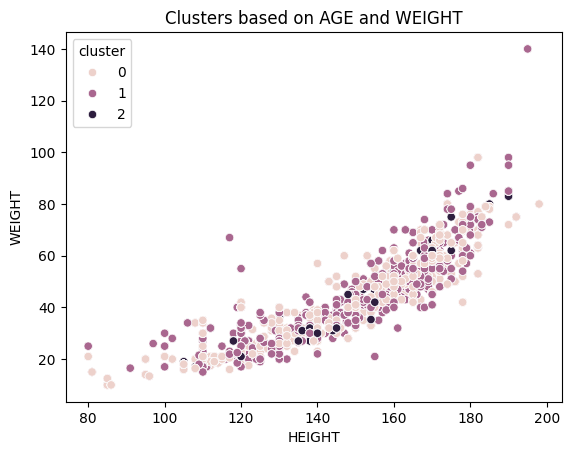

In [109]:
import seaborn as sns
# Example: Analyzing AGE and WEIGHT for each cluster
sns.scatterplot(x='HEIGHT', y='WEIGHT', hue='cluster', data=dataset_no_duplicates)
plt.title('Clusters based on AGE and WEIGHT')
plt.show()